In [1]:
%config IPCompleter.greedy=True

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import open_weather_API_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

city_data = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"


for city in cities:
    query_url = url + "q=" + city + "&appid=" + open_weather_API_key + "&units=imperial"
    
    print("Getting data for " + str(city))
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    if weather_json['cod'] == 200:    
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        city_data.append(city)

    else: print("could not get data for " + str(city))

print("Finished Getting Data")

Getting data for busselton
Getting data for sao filipe
Getting data for hermanus
Getting data for kodiak
Getting data for cabo san lucas
Getting data for east london
Getting data for bredasdorp
Getting data for ushuaia
Getting data for araouane
Getting data for lompoc
Getting data for atuona
Getting data for tasiilaq
Getting data for rikitea
Getting data for cape town
Getting data for mataura
Getting data for barentsburg
could not get data for barentsburg
Getting data for vaini
Getting data for bluff
Getting data for port hardy
Getting data for ponta delgada
Getting data for barrow
Getting data for nuuk
Getting data for vardo
Getting data for mar del plata
Getting data for miles city
Getting data for adrar
Getting data for sentyabrskiy
could not get data for sentyabrskiy
Getting data for mount isa
Getting data for puerto ayora
Getting data for verkhnedneprovskiy
Getting data for cockburn town
Getting data for port elizabeth
Getting data for illoqqortoormiut
could not get data for illoq

Getting data for santa maria
Getting data for isangel
Getting data for jalu
Getting data for labutta
could not get data for labutta
Getting data for guanica
Getting data for bargal
could not get data for bargal
Getting data for waipawa
Getting data for matagami
Getting data for naze
Getting data for kirakira
Getting data for mackay
Getting data for nizhneyansk
could not get data for nizhneyansk
Getting data for douglas
Getting data for salalah
Getting data for longyearbyen
Getting data for ushtobe
Getting data for shenjiamen
Getting data for skibbereen
Getting data for ahipara
Getting data for dingle
Getting data for manggar
Getting data for cap-aux-meules
Getting data for etawah
Getting data for tura
Getting data for san jose
Getting data for gurskoye
could not get data for gurskoye
Getting data for casambalangan
Getting data for mahaicony
could not get data for mahaicony
Getting data for sovetskaya gavan
Getting data for merauke
Getting data for bengkulu
Getting data for ruteng
Getti

Getting data for ust-nera
Getting data for andros town
Getting data for tapes
Getting data for chiang klang
Getting data for najran
Getting data for peruibe
Getting data for smithers
Getting data for bacolod
Getting data for preobrazheniye
Getting data for mocuba
Getting data for toliary
could not get data for toliary
Getting data for norwalk
Getting data for sisimiut
Getting data for maltahohe
Getting data for vila franca do campo
Getting data for nizhniy ingash
Getting data for terrace
Getting data for maykain
could not get data for maykain
Getting data for farmington
Getting data for nelson bay
Getting data for gushikawa
Getting data for gorontalo
Getting data for port keats
Getting data for tomatlan
Getting data for svetlogorsk
Getting data for kigali
Getting data for altamont
Getting data for ugoofaaru
Getting data for brae
Getting data for kupang
Getting data for aflu
could not get data for aflu
Getting data for morehead
Getting data for khash
Getting data for labuhan
Finished Ge

In [4]:
weather_data = pd.DataFrame({"City": city_data, "lat": lat, "Lng": lng, "Max Temp (F)" : max_temp, "Humidity" :humidity,
                            "Cloudiness" : cloudiness, "Wind Speed": wind_speed, "County" : country, "Date": date})

weather_data.to_csv(output_data_file)

weather_data.describe()

,lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Date
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,5.410000e+02
mean,20.270518,15.382514,69.051054,69.855823,49.918669,8.219057,1.593985e+09
std,33.400664,91.660100,14.896727,22.425381,39.059698,5.340230,6.488533e+01
min,-54.800000,-179.170000,32.000000,1.000000,0.000000,0.430000,1.593984e+09
25%,-8.900000,-66.910000,57.200000,57.000000,4.000000,4.140000,1.593985e+09
50%,26.350000,20.070000,71.600000,76.000000,47.000000,6.930000,1.593985e+09
75%,48.010000,95.320000,79.880000,87.000000,90.000000,10.940000,1.593985e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,28.860000,1.593985e+09


In [31]:
today = "7/05/2020"


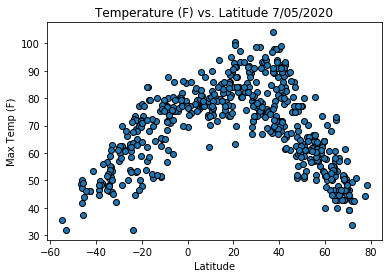

In [32]:
plt.scatter(weather_data["lat"], weather_data["Max Temp (F)"], edgecolors="black")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.title("Temperature (F) vs. Latitude " + str(today) )
plt.show()

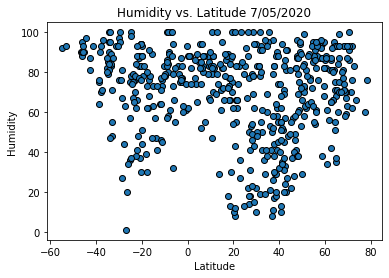

In [33]:
plt.scatter(weather_data["lat"], weather_data["Humidity"], edgecolors="black")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.title("Humidity vs. Latitude " + str(today) )
plt.show()

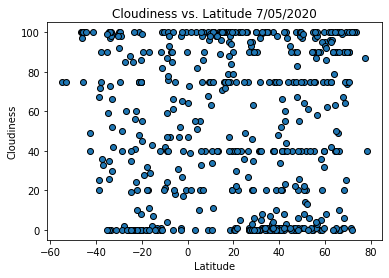

In [34]:
plt.scatter(weather_data["lat"], weather_data["Cloudiness"], edgecolors="black")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.title("Cloudiness vs. Latitude " + str(today) )
plt.show()


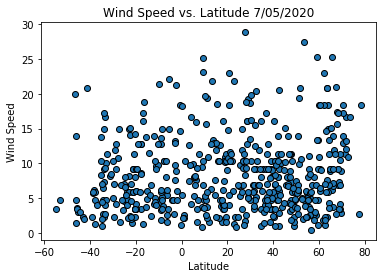

In [35]:
plt.scatter(weather_data["lat"], weather_data["Wind Speed"], edgecolors="black")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.title("Wind Speed vs. Latitude " + str(today) )
plt.show()


## Linear Regression

In [21]:
def regress(x_values, y_values, xlable, ylabel, title):
    
    #plt.figure(figsize=((6,4)))
    plt.scatter(x_values, y_values)
    plt.xlabel(xlable)
    plt.ylabel(ylabel)
    plt.title(title)


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept


    plt.plot(x_values, regress_values, "-r")

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=12,color="green")
    
    plt.savefig("output_data/" + str(title) + ".png")
    
    plt.show()


    print("The r-squared is " + str(rvalue ** 2))

    print("The p-vlaue is " + str(pvalue))



In [11]:
#Create Northern and Southern Hemisphere DataFrames

weather_data_north = weather_data.loc[weather_data["lat"]>= 0, :]
weather_data_south = weather_data.loc[weather_data["lat"]< 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

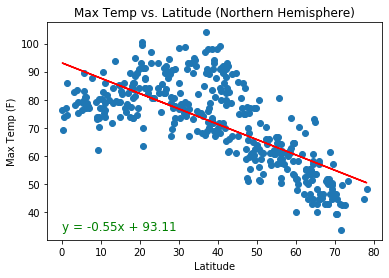

The r-squared is 0.5082090215671661
The p-vlaue is 3.873585711428508e-59


In [22]:
regress(weather_data_north["lat"], weather_data_north["Max Temp (F)"], 
        "Latitude","Max Temp (F)", "Max Temp vs. Latitude (Northern Hemisphere)" )

•	The above graph and regression are modeling latitude vs max temperature in the northern hemisphere
•	The p-value indicates that the results are significant at a 95% confidence level, r-squared indicates 50% of the variation in max temperature can be explained by the latitude


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

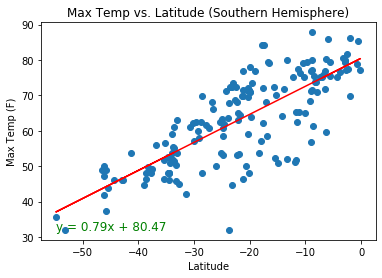

The r-squared is 0.6115375553890906
The p-vlaue is 6.491776366888478e-36


In [23]:
regress(weather_data_south["lat"], weather_data_south["Max Temp (F)"], 
        "Latitude","Max Temp (F)", "Max Temp vs. Latitude (Southern Hemisphere)" )

•	The above graph and regression are modeling latitude vs max temperature in the southern hemisphere
•	The p-value indicates that the results are significant at a 95% confidence level, r-squared indicates 61% of the variation in max temperature can be explained by the latitude


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

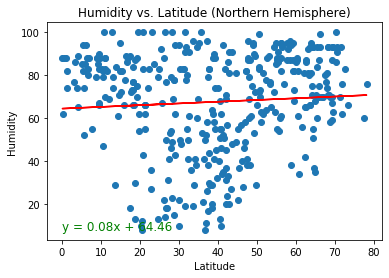

The r-squared is 0.004520141927302542
The p-vlaue is 0.1951223723603743


In [24]:
regress(weather_data_north["lat"], weather_data_north["Humidity"], 
        "Latitude","Humidity", "Humidity vs. Latitude (Northern Hemisphere)" )

•	The above graph and regression are modeling latitude vs humidity in the northern hemisphere
•	The p-value indicates that the results are not significant at a 95% confidence level


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

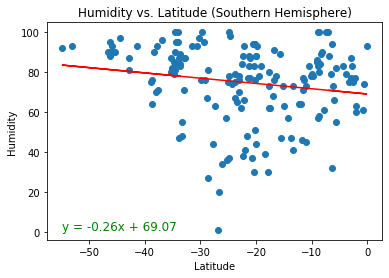

The r-squared is 0.030592406168856126
The p-vlaue is 0.023351457262282674


In [25]:
regress(weather_data_south["lat"], weather_data_south["Humidity"], 
        "Latitude","Humidity", "Humidity vs. Latitude (Southern Hemisphere)" )


•	The above graph and regression are modeling latitude vs humidity in the southern hemisphere
•	The p-value indicates that the results are significant at a 95% confidence level but r-squared indicates only 3% of the variation in humidity can be explained by latitude


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

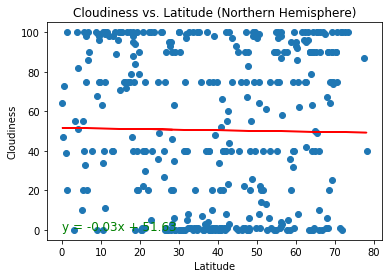

The r-squared is 0.00022992585224297044
The p-vlaue is 0.7703738325926512


In [26]:
regress(weather_data_north["lat"], weather_data_north["Cloudiness"], 
        "Latitude","Cloudiness", "Cloudiness vs. Latitude (Northern Hemisphere)" )

•	The above graph and regression are modeling latitude vs cloudiness in the northern hemisphere
•	The p-value indicates that the results are not significant at a 95% confidence level 


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

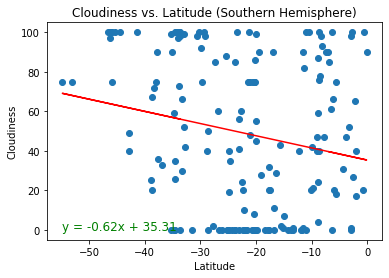

The r-squared is 0.04111605993178231
The p-vlaue is 0.00838819822776968


In [27]:
regress(weather_data_south["lat"], weather_data_south["Cloudiness"], 
        "Latitude","Cloudiness", "Cloudiness vs. Latitude (Southern Hemisphere)" )

•	The above graph and regression are modeling latitude vs cloudiness in the southern hemisphere
•	The p-value indicates that the results are significant at a 95% confidence level but r-squared indicates that only 4% of the variation in windspeed can be explained by latitude


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

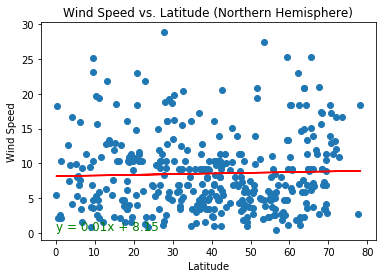

The r-squared is 0.0012231300883654697
The p-vlaue is 0.5007023021844882


In [28]:
regress(weather_data_north["lat"], weather_data_north["Wind Speed"], 
        "Latitude","Wind Speed", "Wind Speed vs. Latitude (Northern Hemisphere)" )


•	The above graph and regression are modeling latitude vs windspeed in the northern hemisphere
•	The p-value indicates that the results are not significant at a 95% confidence level 


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

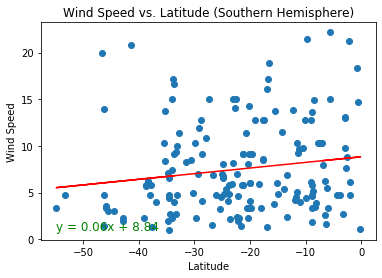

The r-squared is 0.02417762570050349
The p-vlaue is 0.044155472091228935


In [29]:
regress(weather_data_south["lat"], weather_data_south["Wind Speed"], 
        "Latitude","Wind Speed", "Wind Speed vs. Latitude (Southern Hemisphere)" )


•	The above graph and regression are modeling latitude vs windspeed in the southern hemisphere
•	The p-value indicates that the results are significant at a 95% confidence level but r-squared indicates that only 2.4% of the variation in windspeed can be explained by latitude
